In this notebook, I calculate the confidence intervals for the parameters of the exponential and normal distributions.

In [115]:
import numpy as np
from scipy.stats import chi2, expon, norm, t, sem
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (8, 5)

# Confidence interval for exponential distribution

In [2]:
#For graphs
sns.set_style('whitegrid')
x = np.linspace(-10, 10, 1000)

In [133]:
# Parameter
Lambda = 2

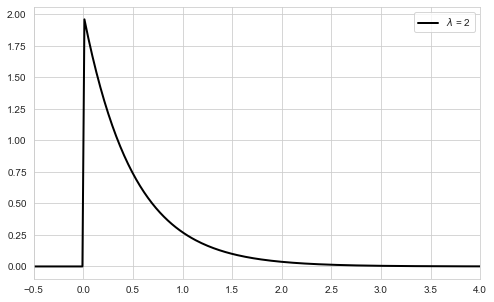

In [134]:
y = expon.pdf(x, scale = 1/Lambda)
plt.plot(x, y, color = 'black', linewidth = 2, label = f'$\lambda$ = {Lambda}')
plt.xlim(-0.5, 4)
plt.legend();

To build confidence interval for exponential parameter we are useing statistics $T = 2\lambda n \overline{X}$ that converges to $\sim \chi^2(2n)$. So, confidence interval for $\lambda$ will be 

$$\left(\dfrac{\chi^2_{\frac{1 -\alpha}{2}}(2n)}{2n\overline{X}}, \dfrac{\chi^2_{\frac{1 + \alpha}{2}}(2n)}{2n\overline{X}}\right)$$

Lets calculate it for different sample sizes $N$

In [201]:
# Different sample sizes
N = [10, 1000, 10000, 1000000]
# Confindence level
alpha = 0.95
for n in N:
    X = np.random.exponential(scale = 1 / Lambda, size = n)
    print(f'Confidence interval for sample size = {n}:\n',
    f'({chi2.ppf((1 - alpha)/2, df = 2 * n)/(2 * n * X.mean())}, {chi2.ppf((1 + alpha) / 2, df = 2 * n)/(2 * n *X.mean())})\n',
    tuple(chi2.interval(alpha = alpha, df = 2 * n) / (2 * n * X.mean())))

Confidence interval for sample size = 10:
 (0.8369941634074811, 2.9820066063330675)
 (0.8369941634074811, 2.9820066063330675)
Confidence interval for sample size = 1000:
 (1.8781894437385909, 2.1261178400445226)
 (1.8781894437385909, 2.1261178400445226)
Confidence interval for sample size = 10000:
 (1.9575868358687278, 2.0358486335749535)
 (1.9575868358687278, 2.0358486335749535)
Confidence interval for sample size = 1000000:
 (1.995965865174318, 2.003805264421812)
 (1.995965865174318, 2.003805264421812)


Above cell shows that both chi2.ppf and chi2.interval can be used to construct interval. Also, as expected, the larger sample we use, the smaller interval we get.

P.S. tried my best to make that print readable

# Confidence interval for the mean of normal distribution when variance is known

In this case statistics $T = \dfrac{X_m - \mu}{\sigma}\sqrt n \sim N(0, 1)$. Hence we get the following interval for the mean: $\left(\overline{X} - \dfrac{\sigma}{\sqrt n} u_{\frac{1 + \alpha}{2}}, \overline{X} + \dfrac{\sigma}{\sqrt n} u_{\frac{1 + \alpha}{2}}\right)$, where $\sigma$ is our variance and $u_\alpha$ - $\alpha$  quantile of the normal distribution.

In [128]:
# Setting parameters
Mu = 2.5
sigma = 2

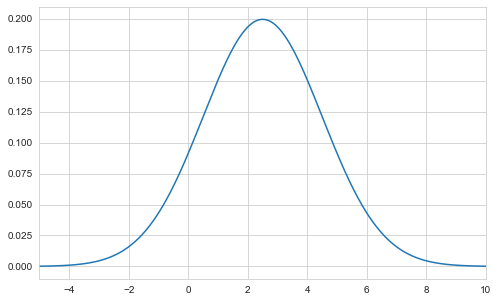

In [200]:
# Some ploting
y = norm.pdf(x, loc = Mu, scale = sigma)
plt.plot(x, y)
plt.xlim(-5, 10);

In [217]:
alpha = 0.95
for n in N:
    X = np.random.normal(loc = Mu, size = n, scale = sigma)
    print(f'Confidence interval for sample size = {n}:\n',
    f'({X.mean() - sigma * norm.ppf((1 + alpha) / 2) / n ** 0.5}, {X.mean() + sigma * norm.ppf((1 + alpha) / 2) / n ** 0.5})\n', 
    norm.interval(alpha = alpha, loc = np.mean(X), scale = sigma / n ** 0.5))

Confidence interval for sample size = 10:
 (0.47394718815930825, 2.9531273173775547)
 (0.47394718815930825, 2.9531273173775547)
Confidence interval for sample size = 1000:
 (2.426468980616492, 2.6743869935383167)
 (2.426468980616492, 2.6743869935383167)
Confidence interval for sample size = 10000:
 (2.456233359019373, 2.5346319184009753)
 (2.456233359019373, 2.5346319184009753)
Confidence interval for sample size = 1000000:
 (2.4993391222178762, 2.5071789781560363)
 (2.4993391222178762, 2.5071789781560363)


Note that in scale parameter of norm.interval function we have to use Standart Error of Mean instead of variance.

# Confidence interval for the mean of normal distribution when variance is unknown

Statistics $T = \dfrac{\overline{X} - \mu}{S}\sqrt n \sim t(n-1)$. Confidence interval: $\left(\overline{X}-\frac{S}{\sqrt{n}} t_{\frac{1 + \alpha}{2}}(n-1),  \overline{X}+\frac{S}{\sqrt{n}} t_{\frac{1 + \alpha}{2}}(n-1)\right)$

In [226]:
alpha = 0.95
for n in N:
    X = np.random.normal(loc = Mu, size = n, scale = sigma)
    print(f'Confidence interval for sample size = {n}:\n',
    f'({X.mean() - X.std(ddof = 1)*t.ppf((1 + alpha) / 2, df = n - 1) / n ** 0.5},',
          f'{X.mean() + X.std(ddof = 1) * t.ppf((1 + alpha) / 2, df = n - 1) / n ** 0.5})\n',
          t.interval(alpha = alpha, df = n - 1, loc = X.mean(), scale = sem(X)))

Confidence interval for sample size = 10:
 (0.6991081507335979, 3.143157090353972)
 (0.6991081507335979, 3.143157090353972)
Confidence interval for sample size = 1000:
 (2.2934848268682266, 2.5344341669558528)
 (2.2934848268682266, 2.5344341669558528)
Confidence interval for sample size = 10000:
 (2.492281339884201, 2.5708963658212243)
 (2.492281339884201, 2.5708963658212243)
Confidence interval for sample size = 1000000:
 (2.496301157884292, 2.5041434878683093)
 (2.496301157884292, 2.5041434878683093)


In most cases, the population variance is unknown, and in practice the above interval is likely to be used.

# Confidence interval for standard derivation of normal distribution

Statistics $T = \dfrac{\overline{X} - \mu}{S}\sqrt n \sim \chi^2(n-1)$ Confidence interval: $\left( \frac{S \sqrt{n-1}}{\sqrt{\chi_{\frac{1 + \alpha}{2}}^{2}(n-1)}}; \frac{S\sqrt{n-1}}{\sqrt{\chi_{\frac{1 - \alpha}{2}}^{2}(n-1)}} \right)$

In [235]:
alpla = 0.95
for n in N:
    print(f'Confidence interval for sample size = {n}:\t'
    f'({X.std(ddof = 1) * (n - 1) ** 0.5 / chi2.ppf((1 + alpha) / 2, df = n - 1) ** 0.5}', 
          f'{X.std(ddof = 1) * (n - 1) ** 0.5 / chi2.ppf((1 - alpha) / 2, df = n - 1) ** 0.5})')

Confidence interval for sample size = 10:	(1.3761028721718054 3.652368170430137)
Confidence interval for sample size = 1000:	(1.916627023845071 2.0923882757062744)
Confidence interval for sample size = 10000:	(1.9732826053660877 2.0287488589218614)
Confidence interval for sample size = 1000000:	(1.9978599080217578 2.0034052786924037)


This should be all the most common confidence intervals, as most real values have a normal distribution (or can be transformed into one), and the waiting time is often distributed exponentially.